# **CASO DE USO: "Panorama de la vivienda en Melbourne"**
El sector inmobiliario de Melbourne está en AUGE. ¿Se puede encontrar la perspectiva o predecir la próxima gran tendencia para convertirse en un magnate inmobiliario... o aún más difícil, para adquirir una unidad de 2 dormitorios a un precio razonable?

Data:

melb_data.csv

Este conjunto de datos se obtuvo de consultar la sgte url: ‎‎https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot.


# **1. Importación de Librerias**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, plot_confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

## **2. Carga del dataset**

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/jorjasso/datasets/main/melb_data.csv", sep = ",")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

**Simular datos faltantes**

In [4]:
for col in ["Car", "Price"]:
  df.loc[df.sample(frac=0.50).index, col] = pd.np.nan
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,NaN,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,NaN,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,NaN,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,NaN,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,NaN,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,NaN,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          6790 non-null   float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            6761 non-null   float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [6]:
df.isna().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price            6790
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car              6819
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

**Acotamos el dataset**

In [6]:
df_missing_val = df.loc[:, ["BuildingArea", "Price", "YearBuilt", "Car"]]
df_missing_val.head(10)

,BuildingArea,Price,YearBuilt,Car
0,NaN,1480000.0,NaN,1.0
1,79.0,1035000.0,1900.0,0.0
2,150.0,1465000.0,1900.0,0.0
3,NaN,850000.0,NaN,1.0
4,142.0,1600000.0,2014.0,2.0
5,NaN,941000.0,NaN,0.0
6,210.0,1876000.0,1910.0,0.0
7,107.0,1636000.0,1890.0,2.0
8,NaN,300000.0,NaN,1.0
9,75.0,1097000.0,1900.0,2.0


# **2. Imputando datos**

In [8]:
#@title funciones de graficas
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
def report_missings(data, opt = 0):
  """
  data = dataframe
  opt = opcion de graficar {0: todo, >0 solo faltantes}
        default= 0
  """
  data_rep = round(data.isna().sum().sort_values(ascending=False)/len(data)*100, 3)
  data_rep2 = data.isna().sum().sort_values(ascending=False)
  df = pd.concat([data_rep2, data_rep], axis=1).reset_index()
  df.columns = ["Variable", "Cant. Nulos", "% Nulos"]
  df["Cant. No Nulos"] = len(data) - df["Cant. Nulos"]
  df = df.reindex(columns=["Variable","Cant. No Nulos","Cant. Nulos","% Nulos"])
    
  print("*"*100)
  print("*"*20, "Reporte General", "*"*20)
  print("*"*100)
  print(df)
  
  if opt:
    data_rep = data_rep[data_rep > 0] # opcional
  miss = data_rep.to_frame()
  miss.columns = ['Cantidad (%)']
  miss.index.names = ['Variable']
  miss['Variable'] = miss.index

  fig = plt.figure(figsize=(10,10))
  #plot the missing value count
  #plt.figure(figsize=(10,6))
  ax1 = fig.add_subplot(3,2,1)
  print("*"*70, "Graficas de datos faltantes", "*"*70)
  print("*"*180)
  missingno.bar(data, figsize=(10,5), fontsize=12, ax=ax1, color="dodgerblue");
  plt.title("Conteo de muestras para cada variable (porcentaje y cantidad)")

  ax3 = fig.add_subplot(3,2,3)
  sns.heatmap(data.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Valores perdidos'})
  plt.title("Distribución de valores perdidos")
  plt.tight_layout()


  ax2 = fig.add_subplot(3,2,2)
  #sns.set(style="whitegrid", color_codes=True)
  sns.barplot(x = 'Variable', y = 'Cantidad (%)', data=miss, ax=ax2)
  plt.title("Porcentaje de datos faltantes por variable")
  plt.xticks(rotation = 90)
  #plt.savefig("missing1.png", dpi=100)
  
  

  ax4 = fig.add_subplot(3,2,4)
  missingno.heatmap(data, cmap="RdYlGn", figsize=(10,5), fontsize=12, ax=ax4)
  plt.title("Correlación de nulidad entre variables")
  ax5 = fig.add_subplot(3,2,5)
  missingno.dendrogram(data, figsize=(10,5), fontsize=12,ax=ax5)
  plt.title("Dendograma basado en la correlación de valores faltantes")
  plt.tight_layout()


****************************************************************************************************
******************** Reporte General ********************
****************************************************************************************************
       Variable  Cant. No Nulos  Cant. Nulos  % Nulos
0           Car            6761         6819   50.214
1         Price            6790         6790   50.000
2  BuildingArea            7130         6450   47.496
3     YearBuilt            8205         5375   39.580
********************************************************************** Graficas de datos faltantes **********************************************************************
************************************************************************************************************************************************************************************


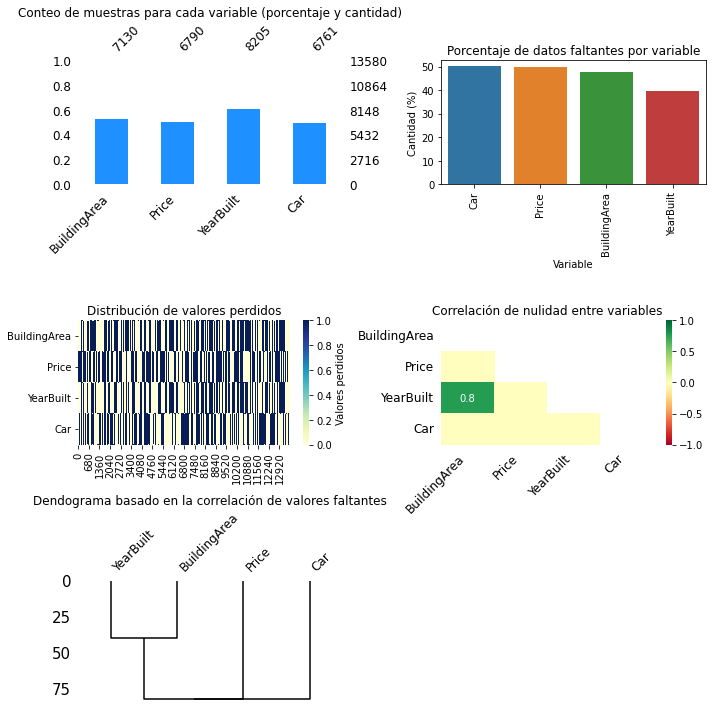

In [9]:
report_missings(df_missing_val)

## **Imputar valores com fordward/backward fill**
* **ffill()**:  Se utiliza para completar el valor que falta en el marco de datos. 'fill' significa 'forward fill' y propagará la última observación válida hacia adelante.
* **bfill()**:  Se usa para completar hacia atrás los valores faltantes en el conjunto de datos. Rellenará hacia atrás los NaNvalores que están presentes en el marco de datos de pandas.**

In [10]:
def imputar(df):
  print(df.head())
  print("missing values : {}".format(df.isna().sum()))
  df.hist()
  print("\n -------------------------")

In [11]:
df_missing_val

,BuildingArea,Price,YearBuilt,Car
0,NaN,1480000.0,NaN,1.0
1,79.0,1035000.0,1900.0,NaN
2,150.0,NaN,1900.0,NaN
3,NaN,NaN,NaN,NaN
4,142.0,NaN,2014.0,2.0
...,...,...,...,...
13575,NaN,1245000.0,1981.0,2.0
13576,133.0,1031000.0,1995.0,2.0
13577,NaN,1170000.0,1997.0,4.0
13578,157.0,2500000.0,1920.0,5.0


   BuildingArea      Price  YearBuilt  Car
0           NaN  1480000.0        NaN  1.0
1          79.0  1035000.0     1900.0  1.0
2         150.0  1035000.0     1900.0  1.0
3         150.0  1035000.0     1900.0  1.0
4         142.0  1035000.0     2014.0  2.0
missing values : BuildingArea    1
Price           0
YearBuilt       1
Car             0
dtype: int64

 -------------------------


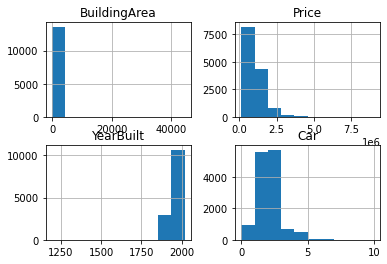

In [12]:
imputar(df_missing_val.ffill())

   BuildingArea      Price  YearBuilt  Car
0          79.0  1480000.0     1900.0  1.0
1          79.0  1035000.0     1900.0  2.0
2         150.0   941000.0     1900.0  2.0
3         142.0   941000.0     2014.0  2.0
4         142.0   941000.0     2014.0  2.0
missing values : BuildingArea    0
Price           0
YearBuilt       0
Car             0
dtype: int64

 -------------------------


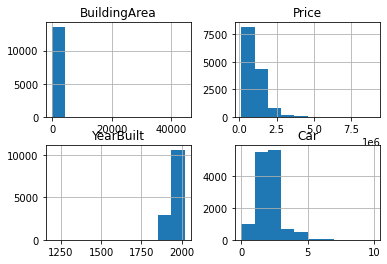

In [13]:
imputar(df_missing_val.bfill())

   BuildingArea      Price  YearBuilt  Car
0          79.0  1035000.0     1900.0  1.0
1          79.0  1035000.0     1900.0  0.0
2         150.0  1035000.0     1900.0  0.0
3         150.0  1035000.0     1900.0  1.0
4         142.0  1600000.0     2014.0  1.0
missing values : BuildingArea    0
Price           0
YearBuilt       0
Car             0
dtype: int64

 -------------------------


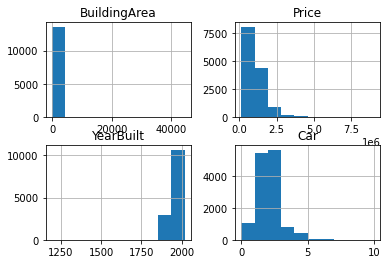

In [ ]:
imputar(df_missing_val.ffill().bfill())

## **Imputación basada en estadísticas**

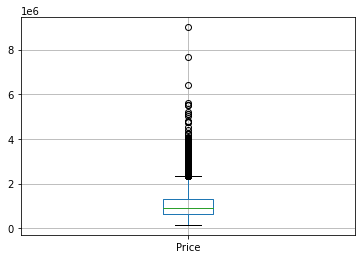

In [14]:
boxplot = df_missing_val[['Price']].boxplot()  

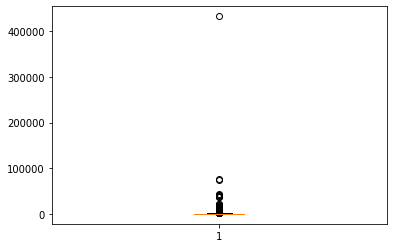

In [23]:
fig1, ax1 = plt.subplots()
fig1 = plt.boxplot(df['Landsize'])

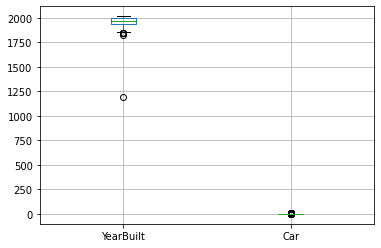

In [28]:
boxplot = df_missing_val.drop(columns = ["Price", "BuildingArea"]).boxplot()  

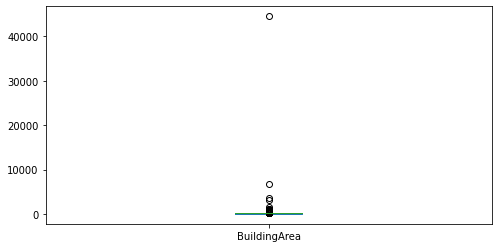

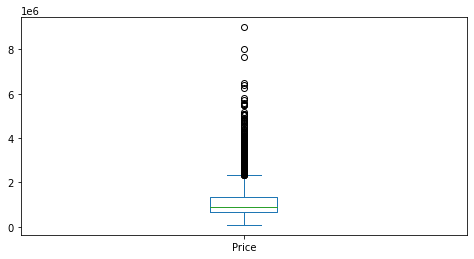

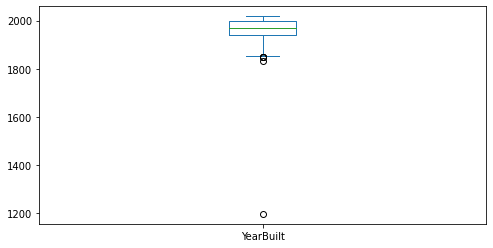

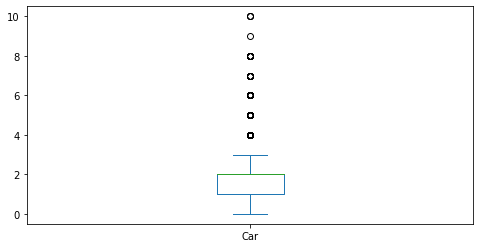

In [29]:
for column in df_missing_val:
    df[column].plot.box(figsize=(8,4))
    plt.show()

In [ ]:
salida = [df_missing_val.mean().round(2), df_missing_val.median(), df_missing_val.quantile(0.25)]
result = pd.concat(salida, axis = 1)
result.columns = ["mean", "median", "quantile"]
result

,mean,median,quantile
BuildingArea,151.97,126.0,93.0
Price,1059754.16,892250.0,645425.0
YearBuilt,1964.68,1970.0,1940.0
Car,1.61,2.0,1.0


   BuildingArea         Price    YearBuilt       Car
0     151.96765  1.480000e+06  1964.684217  1.605711
1      79.00000  1.059754e+06  1900.000000  0.000000
2     150.00000  1.059754e+06  1900.000000  1.605711
3     151.96765  8.500000e+05  1964.684217  1.605711
4     142.00000  1.059754e+06  2014.000000  1.605711
missing values : BuildingArea    0
Price           0
YearBuilt       0
Car             0
dtype: int64

 -------------------------


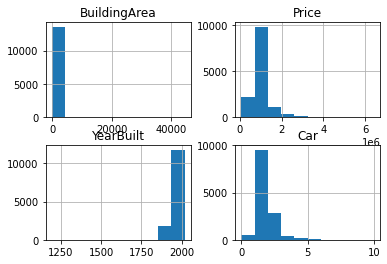

In [ ]:
imputar(df_missing_val.fillna(df.mean()))

   BuildingArea      Price  YearBuilt  Car
0         126.0  1480000.0     1970.0  2.0
1          79.0   892250.0     1900.0  0.0
2         150.0   892250.0     1900.0  2.0
3         126.0   850000.0     1970.0  2.0
4         142.0   892250.0     2014.0  2.0
missing values : BuildingArea    0
Price           0
YearBuilt       0
Car             0
dtype: int64

 -------------------------


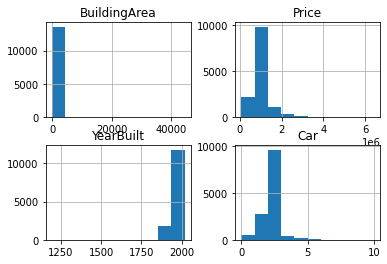

In [ ]:
imputar(df_missing_val.fillna(df.median()))


   BuildingArea      Price  YearBuilt  Car
0          93.0  1480000.0     1940.0  1.0
1          79.0   645425.0     1900.0  0.0
2         150.0   645425.0     1900.0  1.0
3          93.0   850000.0     1940.0  1.0
4         142.0   645425.0     2014.0  1.0
missing values : BuildingArea    0
Price           0
YearBuilt       0
Car             0
dtype: int64

 -------------------------


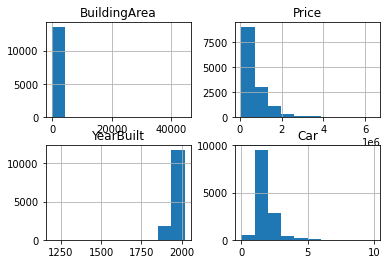

In [ ]:
imputar(df_missing_val.fillna(df.quantile(0.25)))

## **Imputar con interpolación**

In [ ]:
df_missing_val.head()

,BuildingArea,Price,YearBuilt,Car
0,NaN,1480000.0,NaN,NaN
1,79.0,1035000.0,1900.0,NaN
2,150.0,1465000.0,1900.0,NaN
3,NaN,NaN,NaN,NaN
4,142.0,1600000.0,2014.0,2.0


   BuildingArea      Price  YearBuilt        Car
0           NaN  1480000.0  1480000.0  1480000.0
1          79.0      989.5     1900.0        0.0
2         150.0     1025.0     1900.0     1900.0
3           NaN   850000.0   850000.0   850000.0
4         142.0     1078.0     2014.0     2014.0
missing values : BuildingArea    6450
Price           3189
YearBuilt       2547
Car             1272
dtype: int64

 -------------------------
   BuildingArea         Price    YearBuilt       Car
0           NaN  1.480000e+06          NaN       NaN
1     79.000000  1.326491e+06  1900.000000  0.000000
2    150.000000  1.116491e+06  1900.000000  0.744441
3    148.715056  8.500000e+05  1963.854959  1.324438
4    142.000000  5.270176e+05  2014.000000  1.739993
missing values : BuildingArea    1
Price           1
YearBuilt       1
Car             2
dtype: int64

 -------------------------


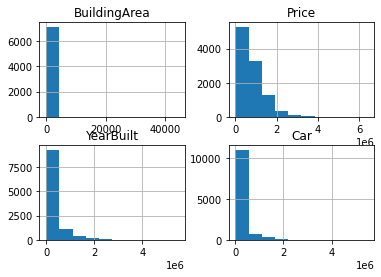

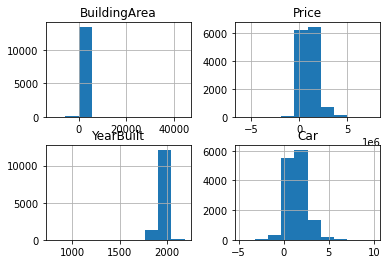

In [ ]:
imputar(df_missing_val.interpolate(method='linear', limit_direction='forward', axis=1))
imputar(df_missing_val.interpolate(method='polynomial',order=2))

## **Usando sklearn**

Recuerde que en ML la estrategia y parametros usandos para imputar en el conjunto de entrenamiento se debe usar en el conjunto de teste

Usaremos un modelo de regresión de random forest para medir el desempeño de los imputadores

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv("https://raw.githubusercontent.com/jorjasso/datasets/main/melb_data.csv")

df.head()
y=df['Price']
X=df.drop(['Price'], axis=1).select_dtypes(exclude=['object'])

#division entrenamiento/test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25,random_state=0)

# modelo de regresión usando random forest para medir la calidad del imputador
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np


def score_dataset(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor(n_estimators=10, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_absolute_error(y_test, preds)

`from sklearn.impute import SimpleImputer`

Transformador de imputación para completar valores faltantes.
La estrategia de imputación.

* Si es "mean", reemplace los valores faltantes usando la media a lo largo de cada columna. Solo se puede utilizar con datos numéricos.

* Si es "median", reemplace los valores faltantes usando la mediana a lo largo de cada columna. Solo se puede utilizar con datos numéricos.

* Si es "most_frequent", reemplace lo que falta usando el valor más frecuente en cada columna. Se puede utilizar con cadenas o datos numéricos. Si hay más de uno de estos valores, solo se devuelve el más pequeño.

* Si es "constant", reemplace los valores faltantes con fill_value. Se puede utilizar con cadenas o datos numéricos.


In [ ]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
print("MAE from Approach 2 (mean):")
print(score_dataset(my_imputer.fit_transform(X_train), my_imputer.transform(X_test), y_train, y_test))

#my_imputer.fit(X_train)
#my_imputer.transform(X_train)

my_imputer = SimpleImputer(strategy='median')
print("MAE from Approach 3 (Imputation):")
print(score_dataset(my_imputer.fit_transform(X_train), my_imputer.transform(X_test), y_train, y_test))

my_imputer = SimpleImputer(strategy='most_frequent')
print("MAE from Approach 4 (Imputation):")
print(score_dataset(my_imputer.fit_transform(X_train), my_imputer.transform(X_test), y_train, y_test))

my_imputer = SimpleImputer(strategy='constant')
print("MAE from Approach 5 (Imputation):")
print(score_dataset(my_imputer.fit_transform(X_train), my_imputer.transform(X_test), y_train, y_test))

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

my_imputer = IterativeImputer(max_iter=10, random_state=0)
print("MAE from Approach 6 (Imputation):")
print(score_dataset(my_imputer.fit_transform(X_train), my_imputer.transform(X_test), y_train, y_test))

#imputacion usando KNN
from sklearn.impute import KNNImputer
my_imputer =  KNNImputer(n_neighbors=10, weights="uniform")
print("MAE from Approach 7 (Imputation):")
print(score_dataset(my_imputer.fit_transform(X_train), my_imputer.transform(X_test), y_train, y_test))

MAE from Approach 2 (mean):
183550.01819342168
MAE from Approach 3 (Imputation):
184379.1561512027
MAE from Approach 4 (Imputation):
184637.99714285712
MAE from Approach 5 (Imputation):
183326.16025527738
MAE from Approach 6 (Imputation):
188701.9632106038
MAE from Approach 7 (Imputation):
182823.1710652921
